# 1. Implement Simple Linear Regression using Head Size as the independent variable and Brain Weight as dependent variable from headbrain.csv file.Also predict the brain weight for a new head size.

(237, 4)
Slope (m): 0.26342933948939945
Intercept (c): 325.57342104944223
Enter a new value:1234
Predicted Brain Weight for 1234 : 650.6452259793612


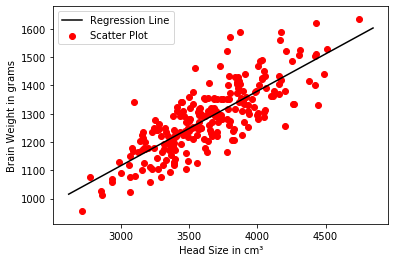

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from a CSV file (assuming you have a 'headbrain.csv' file)
data = pd.read_csv('headbrain.csv')

# Display the shape (number of rows and columns) of the dataset
print(data.shape)

# Display the first few rows of the dataset to get an overview
data.head()

# Extract the 'Head Size(cm^3)' and 'Brain Weight(grams)' columns as X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

# Calculate the mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Get the total number of data points
n = len(X)

# Calculate the coefficients 'm' (slope) and 'c' (intercept) of the linear regression line
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

# Print the coefficients
print("Slope (m):", m)
print("Intercept (c):", c)

# Define a function to predict brain weight based on the linear regression model
def predict(c, m, X):
    return c + (m * X)

# Get a new head size value from the user
new_head_size = int(input("Enter a new value:"))

# Use the predict function to calculate the predicted brain weight
predicted_brain_weight = predict(c, m, new_head_size)

# Print the predicted brain weight for the new head size
print("Predicted Brain Weight for", new_head_size, ":", predicted_brain_weight)

# Calculate the range of x values for the regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Generate a range of x values for the regression line
x = np.linspace(min_x, max_x, 1000)

# Calculate the corresponding y values using the linear regression model
y = c + m * x

# Plot the regression line and scatter plot of the data points
plt.plot(x, y, color='black', label='Regression Line')
plt.scatter(X, Y, c='red', label='Scatter Plot')

# Add labels and a legend to the plot
plt.xlabel('Head Size in cm³')
plt.ylabel('Brain Weight in grams')
plt.legend()

# Display the plot
plt.show()


# 2. Implement Simple Linear regression  using price column as the dependent variable and the column total_sqft_int as the independent variable using the file hprice.csv. Find the root mean square error and R squared value.

Root Mean Square Error (RMSE): 60.14998267140066
R-squared value: 0.6813201159073554


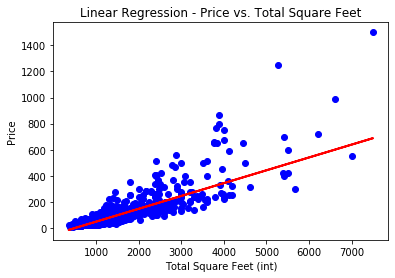

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset from a CSV file (update the file path accordingly)
data = pd.read_csv('/home/mca/Downloads/AI Ml LAB/Assignment 5 aiml/hprice.csv')

# Define independent (X) and dependent (y) variables
X = data['total_sqft_int'].values.reshape(-1, 1)  # Independent variable: total square footage
y = data['price'].values  # Dependent variable: house price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Root Mean Square Error (RMSE) and R-squared (R2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the RMSE and R2 to evaluate the model's performance
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-squared value: {r2}")

# Visualize the regression line and scatter plot
plt.scatter(X_test, y_test, color='blue')  # Scatter plot of actual data points
plt.plot(X_test, y_pred, color='red', linewidth=2)  # Regression line
plt.xlabel('Total Square Feet (int)')
plt.ylabel('Price')
plt.title('Linear Regression - Price vs. Total Square Feet')
plt.show()  # Display the plot


# 3. Predict the price for one new price and then for 3 new prices.

In [8]:
# Create an array of new total_sqft_int values
new_total_sqft_int = np.array([1200, 1500, 1800, 2000])

# Reshape the array to match the input format of the model (1D array)
new_total_sqft_int = new_total_sqft_int.reshape(-1, 1)

# Predict the prices for the new values
new_prices = model.predict(new_total_sqft_int)

# Print the predicted prices
for i, sqft in enumerate(new_total_sqft_int):
    print(f"Predicted price for {sqft} sq. ft.: ${new_prices[i]:.2f}")


Predicted price for [1200] sq. ft.: $68.43
Predicted price for [1500] sq. ft.: $97.97
Predicted price for [1800] sq. ft.: $127.50
Predicted price for [2000] sq. ft.: $147.20


# 4. Implement 3rd question using Sklearn API. Use only 75% of the data for training and the rest for testing. (Plot the graph)

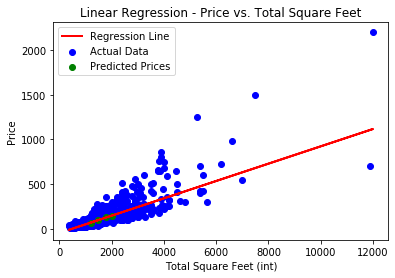

Predicted price for [1200] sq. ft.: $68.57
Predicted price for [1500] sq. ft.: $97.70
Predicted price for [1800] sq. ft.: $126.82
Predicted price for [2000] sq. ft.: $146.24


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset from a CSV file (update the file path accordingly)
data = pd.read_csv('/home/mca/Downloads/AI Ml LAB/Assignment 5 aiml/hprice.csv')

# Define independent (X) and dependent (y) variables
X = data['total_sqft_int'].values.reshape(-1, 1)  # Independent variable: total square footage
y = data['price'].values  # Dependent variable: house price

# Split the data into training (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Create an array of new total_sqft_int values to predict prices for
new_total_sqft_int = np.array([1200, 1500, 1800, 2000])

# Reshape the array to match the input format of the model (1D array)
new_total_sqft_int = new_total_sqft_int.reshape(-1, 1)

# Predict the prices for the new values
new_prices = model.predict(new_total_sqft_int)

# Plot the graph
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Scatter plot of actual data points
plt.plot(X_test, model.predict(X_test), color='red', linewidth=2, label='Regression Line')  # Regression line for test data
plt.scatter(new_total_sqft_int, new_prices, color='green', marker='o', label='Predicted Prices')  # Predicted prices for new values
plt.xlabel('Total Square Feet (int)')
plt.ylabel('Price')
plt.title('Linear Regression - Price vs. Total Square Feet')
plt.legend()
plt.show()  # Display the plot

# Print the predicted prices for new values
for i, sqft in enumerate(new_total_sqft_int):
    print(f"Predicted price for {sqft} sq. ft.: ${new_prices[i]:.2f}")
